This is a data analysis of Reddit posts pertaining to the effects of AI on the job market. We start by importing the libraries that we will need.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter 
import re

Next, we import our dataset into Pandas for processing.

In [2]:
df = pd.read_csv('ai_automation_job_market_data200_edit.csv',encoding='latin1')

pd.set_option('display.max_columns', None) # Avoid truncation

Now it's time for initial data exploration

In [3]:
df

,Title,Selftext,Score,Number of Comments,Created UTC,Unnamed: 5
0,CMV: People who think that most jobs are going...,I have been lucky enough to have a career path...,705,511.0,1.708275e+09,NaN
1,Is this the last presidential election in US h...,[Uber is partnering with Chinese firm BYD to b...,406,230.0,1.727364e+09,NaN
2,What will the stock market do if ai creates gr...,I know nobody has a crystal ball and no one ca...,36,166.0,1.726364e+09,NaN
3,"I'm Nick Kolakowski, Senior Editor at Dice. AM...","Hi! I?m Nick Kolakowski, the Senior Editor of...",102,143.0,1.718886e+09,NaN
4,The Elephant In the Room with AI art and AI Au...,"\n\nAs I see it, the main issue with AI art a...",165,334.0,1.672166e+09,NaN
...,...,...,...,...,...,...
173,What does the future of our work look like in ...,I'm sure we've all been thinking a lot lately ...,18,79.0,1.728255e+09,NaN
174,"Blackmen, is this dystopian reality possible?",\nIs this dystopian reality possible?\n\n\t??M...,10,42.0,1.739900e+09,NaN
175,Learnings from my Experience in USA: [BTech ->...,**TLDR:**\n\n1. US immigration and job landsca...,128,40.0,1.733100e+09,NaN
176,The 15 Best (Free to Use) AI Tools for Creatin...,While we wait for ChatGPT to roll out its own ...,458,64.0,1.695663e+09,NaN


The first thing we notice is there's an unnecessary column with NaN (non-numerical, invalid) values. In addition, the timestamp column in UTC isn't in an easily human-readable format, so it needs to be displayed as a human-readable date even though UTC is easier to use for data processing.

In [4]:
df = df.drop('Unnamed: 5', axis=1)

In [5]:
df

,Title,Selftext,Score,Number of Comments,Created UTC
0,CMV: People who think that most jobs are going...,I have been lucky enough to have a career path...,705,511.0,1.708275e+09
1,Is this the last presidential election in US h...,[Uber is partnering with Chinese firm BYD to b...,406,230.0,1.727364e+09
2,What will the stock market do if ai creates gr...,I know nobody has a crystal ball and no one ca...,36,166.0,1.726364e+09
3,"I'm Nick Kolakowski, Senior Editor at Dice. AM...","Hi! I?m Nick Kolakowski, the Senior Editor of...",102,143.0,1.718886e+09
4,The Elephant In the Room with AI art and AI Au...,"\n\nAs I see it, the main issue with AI art a...",165,334.0,1.672166e+09
...,...,...,...,...,...
173,What does the future of our work look like in ...,I'm sure we've all been thinking a lot lately ...,18,79.0,1.728255e+09
174,"Blackmen, is this dystopian reality possible?",\nIs this dystopian reality possible?\n\n\t??M...,10,42.0,1.739900e+09
175,Learnings from my Experience in USA: [BTech ->...,**TLDR:**\n\n1. US immigration and job landsca...,128,40.0,1.733100e+09
176,The 15 Best (Free to Use) AI Tools for Creatin...,While we wait for ChatGPT to roll out its own ...,458,64.0,1.695663e+09


Having cleaned our dataset, the next thing to do is check the frequency of specific key terms in our post data, both the titles and main text. We will go through the lists of text, and find the most commonly occurring words.

This function is completely hand-written, because an attempt to use [Anaconda Assistant](https://www.anaconda.com/capability/anaconda-assistant) to generate an example resulted in a function with too many parameters, redundant comments, and variable names that don't flow particularly well with the conventions used elsewhere in this notebook. It also turned out to be highly inefficient and thus a new approach based on the advantages of the Pandas library has been implemented. As a result, the cell with AI-generated code was removed and replaced with this hand-written function. Only the most superficial code to lower the case of all characters in a string was reused from generated code. [Anaconda Assistant](https://www.anaconda.com/capability/anaconda-assistant) has been turned off for this notebook and will not be used for anything else.

We referenced this documentation in order to better understand dictionaries: https://docs.python.org/3/tutorial/datastructures.html#dictionaries

We referenced this documentation to help us remove non-letters (i.e. punctuation): https://www.geeksforgeeks.org/python-remove-punctuation-from-string/

This function is to be reused for both titles and post bodies.

In [6]:
import re

def string_frequency(column):
    strings_lower = df[column].str.lower()

    # Make sure only strings are present
    strings_lower = [s for s in strings_lower if isinstance(s, str)]

    frequencies = {}

    for string in strings_lower:
        string = re.sub(r'[^\w\s]', '', string)
        split_string = string.split()

        for word in split_string:
            if word in frequencies:
                frequencies[word] += 1
            else:
                frequencies[word] = 1

    return frequencies

Verify the columns that will have their text processed.

In [7]:
df["Title"]

0      CMV: People who think that most jobs are going...
1      Is this the last presidential election in US h...
2      What will the stock market do if ai creates gr...
3      I'm Nick Kolakowski, Senior Editor at Dice. AM...
4      The Elephant In the Room with AI art and AI Au...
                             ...                        
173    What does the future of our work look like in ...
174        Blackmen, is this dystopian reality possible?
175    Learnings from my Experience in USA: [BTech ->...
176    The 15 Best (Free to Use) AI Tools for Creatin...
177                      Been Unemployed for 1 Year! ?
Name: Title, Length: 178, dtype: object

In [8]:
df["Selftext"]

0      I have been lucky enough to have a career path...
1      [Uber is partnering with Chinese firm BYD to b...
2      I know nobody has a crystal ball and no one ca...
3      Hi! I?m Nick Kolakowski, the Senior Editor of...
4       \n\nAs I see it, the main issue with AI art a...
                             ...                        
173    I'm sure we've all been thinking a lot lately ...
174    \nIs this dystopian reality possible?\n\n\t??M...
175    **TLDR:**\n\n1. US immigration and job landsca...
176    While we wait for ChatGPT to roll out its own ...
177    It's official... I've been unemployed for 1 ye...
Name: Selftext, Length: 178, dtype: object

Here we check the frequency of key terms in post titles, saved to title_df.

In [9]:
title_df=string_frequency('Title')

Here, we will sort the frequencies in descending order, such that we can see the most frequent words used in posts. We used this Stack Overflow to reference how to do this using the lambda function: https://www.geeksforgeeks.org/sort-dictionary-by-value-python-descending/

In [10]:
title_df = dict(sorted(title_df.items(), key=lambda item: item[1], reverse=True))
display(title_df)

{'the': 121,
 'and': 77,
 'ai': 67,
 'to': 62,
 'of': 59,
 'in': 53,
 'a': 48,
 'for': 39,
 'is': 38,
 'job': 37,
 'how': 29,
 'i': 29,
 'market': 27,
 'jobs': 25,
 'automation': 24,
 'will': 22,
 'my': 21,
 'you': 21,
 'it': 20,
 'what': 19,
 'on': 19,
 'be': 17,
 'are': 15,
 'do': 14,
 'with': 14,
 'by': 12,
 'about': 12,
 'an': 12,
 'get': 11,
 'tools': 11,
 'future': 11,
 'that': 10,
 'as': 10,
 'we': 10,
 'people': 9,
 'think': 9,
 'this': 9,
 'if': 9,
 'their': 9,
 'at': 9,
 'not': 9,
 'but': 8,
 'no': 8,
 'start': 8,
 'should': 8,
 'have': 7,
 'just': 7,
 '2025': 7,
 'or': 7,
 'your': 7,
 'marketing': 7,
 'who': 6,
 'next': 6,
 'us': 6,
 'growth': 6,
 'due': 6,
 'from': 6,
 'use': 6,
 'one': 6,
 'cmv': 5,
 'stock': 5,
 'creates': 5,
 'also': 5,
 'makes': 5,
 'lose': 5,
 'tech': 5,
 'more': 5,
 'chatgpt': 5,
 'stellaris': 5,
 'rise': 5,
 'need': 5,
 'impact': 5,
 'time': 5,
 'dev': 5,
 'heres': 5,
 'has': 5,
 'years': 5,
 '15': 5,
 'our': 5,
 'make': 5,
 'some': 5,
 'replaced': 4

We see there are commonly occurring words (i.e. the, and, of, I, My, you) that we do not necessarily 'care' about for the purposes of this project, so we will attempt to remove them. We will remove around 15-20 keys just to see what happens, and used this stack overflow as reference to know about the pop function!

In [11]:
title_df.pop('the')
title_df.pop('and')
title_df.pop('to')
title_df.pop('of')
title_df.pop('in')
title_df.pop('a')
title_df.pop('for')
title_df.pop('is')
title_df.pop('i')
title_df.pop('will')
title_df.pop('my')
title_df.pop('you')
title_df.pop('on')
title_df.pop('be')
title_df.pop('it')
title_df.pop('are')
title_df.pop('do')
title_df.pop('with')
title_df.pop('by')
title_df.pop('about')
title_df.pop('as')
title_df.pop('an')
title_df.pop('that')
title_df.pop('we')
title_df.pop('at')
title_df.pop('their')

display(title_df)

{'ai': 67,
 'job': 37,
 'how': 29,
 'market': 27,
 'jobs': 25,
 'automation': 24,
 'what': 19,
 'get': 11,
 'tools': 11,
 'future': 11,
 'people': 9,
 'think': 9,
 'this': 9,
 'if': 9,
 'not': 9,
 'but': 8,
 'no': 8,
 'start': 8,
 'should': 8,
 'have': 7,
 'just': 7,
 '2025': 7,
 'or': 7,
 'your': 7,
 'marketing': 7,
 'who': 6,
 'next': 6,
 'us': 6,
 'growth': 6,
 'due': 6,
 'from': 6,
 'use': 6,
 'one': 6,
 'cmv': 5,
 'stock': 5,
 'creates': 5,
 'also': 5,
 'makes': 5,
 'lose': 5,
 'tech': 5,
 'more': 5,
 'chatgpt': 5,
 'stellaris': 5,
 'rise': 5,
 'need': 5,
 'impact': 5,
 'time': 5,
 'dev': 5,
 'heres': 5,
 'has': 5,
 'years': 5,
 '15': 5,
 'our': 5,
 'make': 5,
 'some': 5,
 'replaced': 4,
 'lots': 4,
 'ama': 4,
 'huge': 4,
 'corporations': 4,
 'free': 4,
 'income': 4,
 'company': 4,
 'out': 4,
 'there': 4,
 'may': 4,
 'they': 4,
 'actually': 4,
 'employment': 4,
 'me': 4,
 'automate': 4,
 'would': 4,
 'into': 4,
 'way': 4,
 'than': 4,
 'getting': 4,
 'new': 4,
 'business': 4,
 'now

We will do the same process for the material in the selftext.

In [12]:
selftext_df=string_frequency('Selftext')

In [13]:
selftext_df = dict(sorted(selftext_df.items(), key=lambda item: item[1], reverse=True))
display(selftext_df)

{'the': 5599,
 'to': 4638,
 'and': 4432,
 'a': 3533,
 'of': 2943,
 'in': 2141,
 'is': 1948,
 'for': 1900,
 'that': 1703,
 'you': 1505,
 'i': 1436,
 'ai': 1351,
 'it': 1346,
 'this': 1215,
 'with': 1137,
 'on': 1130,
 'are': 1064,
 'be': 958,
 'will': 907,
 'as': 828,
 'have': 784,
 'or': 751,
 'can': 693,
 'but': 689,
 'not': 640,
 'your': 623,
 'they': 607,
 'if': 588,
 'its': 583,
 'from': 575,
 'an': 563,
 'their': 560,
 'we': 549,
 'more': 547,
 'my': 524,
 'by': 499,
 'at': 494,
 'now': 492,
 'like': 472,
 'so': 451,
 'do': 450,
 'all': 444,
 'job': 438,
 'about': 415,
 'people': 413,
 'how': 408,
 'just': 406,
 'what': 400,
 'no': 391,
 'would': 349,
 'some': 348,
 'was': 342,
 'get': 334,
 'has': 330,
 'work': 321,
 'these': 315,
 'one': 315,
 'new': 310,
 'market': 303,
 'jobs': 301,
 'time': 301,
 'out': 299,
 'into': 295,
 'make': 288,
 'when': 287,
 'even': 286,
 'there': 279,
 'other': 277,
 'dont': 272,
 'than': 272,
 'up': 262,
 'them': 262,
 'which': 262,
 'im': 257,
 'a

In [14]:
selftext_df.pop('the')
selftext_df.pop('to')
selftext_df.pop('and')
selftext_df.pop('a')
selftext_df.pop('of')
selftext_df.pop('in')
selftext_df.pop('is')
selftext_df.pop('for')
selftext_df.pop('that')
selftext_df.pop('you')
selftext_df.pop('i')
selftext_df.pop('it')
selftext_df.pop('this')
selftext_df.pop('with')
selftext_df.pop('on')
selftext_df.pop('are')
selftext_df.pop('be')
selftext_df.pop('will')
selftext_df.pop('as')
selftext_df.pop('have')
selftext_df.pop('or')
selftext_df.pop('can')
selftext_df.pop('but')
selftext_df.pop('your')
selftext_df.pop('they')
selftext_df.pop('if')
selftext_df.pop('from')
selftext_df.pop('we')
selftext_df.pop('my')
selftext_df.pop('by')
selftext_df.pop('at')
selftext_df.pop('an')
selftext_df.pop('their')

display(selftext_df)

{'ai': 1351,
 'not': 640,
 'its': 583,
 'more': 547,
 'now': 492,
 'like': 472,
 'so': 451,
 'do': 450,
 'all': 444,
 'job': 438,
 'about': 415,
 'people': 413,
 'how': 408,
 'just': 406,
 'what': 400,
 'no': 391,
 'would': 349,
 'some': 348,
 'was': 342,
 'get': 334,
 'has': 330,
 'work': 321,
 'these': 315,
 'one': 315,
 'new': 310,
 'market': 303,
 'jobs': 301,
 'time': 301,
 'out': 299,
 'into': 295,
 'make': 288,
 'when': 287,
 'even': 286,
 'there': 279,
 'other': 277,
 'dont': 272,
 'than': 272,
 'up': 262,
 'them': 262,
 'which': 262,
 'im': 257,
 'also': 251,
 'me': 250,
 'because': 249,
 'data': 249,
 'use': 248,
 'who': 243,
 'could': 237,
 'most': 222,
 'where': 221,
 'automation': 219,
 'many': 214,
 'over': 214,
 'companies': 207,
 'only': 207,
 'need': 203,
 'our': 198,
 'tools': 198,
 'tool': 196,
 'been': 195,
 'were': 192,
 'want': 187,
 'much': 186,
 'any': 183,
 'using': 182,
 'think': 179,
 'those': 175,
 'us': 173,
 'company': 173,
 'going': 169,
 'first': 168,
 '

We are also curious about the frequency of words occurring in the combination of titles and selftext, so we analyze this here. We learned how to merge dictionaries through this stack overflow page: https://www.geeksforgeeks.org/python-merging-two-dictionaries/

In [15]:
combinedtext_df = title_df | selftext_df

combinedtext_df = dict(sorted(combinedtext_df.items(), key=lambda item: item[1], reverse=True))
display(combinedtext_df)

{'ai': 1351,
 'not': 640,
 'its': 583,
 'more': 547,
 'now': 492,
 'like': 472,
 'so': 451,
 'do': 450,
 'all': 444,
 'job': 438,
 'about': 415,
 'people': 413,
 'how': 408,
 'just': 406,
 'what': 400,
 'no': 391,
 'would': 349,
 'some': 348,
 'was': 342,
 'get': 334,
 'has': 330,
 'work': 321,
 'one': 315,
 'these': 315,
 'new': 310,
 'market': 303,
 'jobs': 301,
 'time': 301,
 'out': 299,
 'into': 295,
 'make': 288,
 'when': 287,
 'even': 286,
 'there': 279,
 'other': 277,
 'than': 272,
 'dont': 272,
 'up': 262,
 'them': 262,
 'which': 262,
 'im': 257,
 'also': 251,
 'me': 250,
 'because': 249,
 'data': 249,
 'use': 248,
 'who': 243,
 'could': 237,
 'most': 222,
 'where': 221,
 'automation': 219,
 'over': 214,
 'many': 214,
 'companies': 207,
 'only': 207,
 'need': 203,
 'tools': 198,
 'our': 198,
 'tool': 196,
 'been': 195,
 'were': 192,
 'want': 187,
 'much': 186,
 'any': 183,
 'using': 182,
 'think': 179,
 'those': 175,
 'us': 173,
 'company': 173,
 'going': 169,
 'first': 168,
 '

Data tables can be overwhelming to read, so it's better to visualize our data. For these purposes, we will display bar graphs of the frequency of each term for each post. First, we will display a grid of graphs for each title, and then we will do the same for post bodies.

/var/folders/xm/2y1pj4qd41lfyk7w6m_9x_zr0000gn/T/ipykernel_62952/120283760.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(key_terms, rotation=45, fontsize=8)


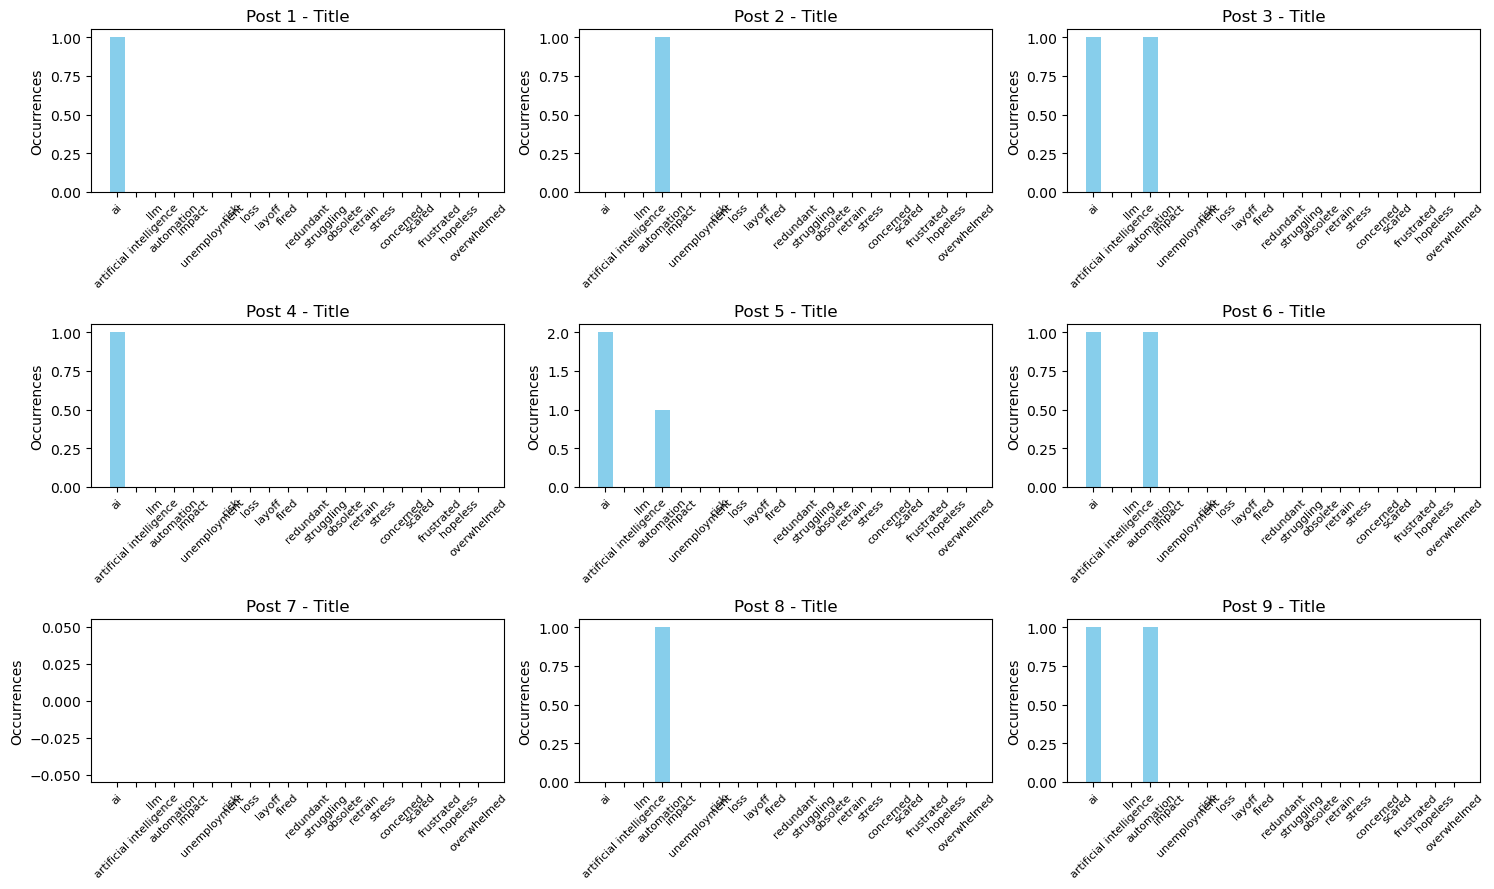

/var/folders/xm/2y1pj4qd41lfyk7w6m_9x_zr0000gn/T/ipykernel_62952/120283760.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(key_terms, rotation=45, fontsize=8)


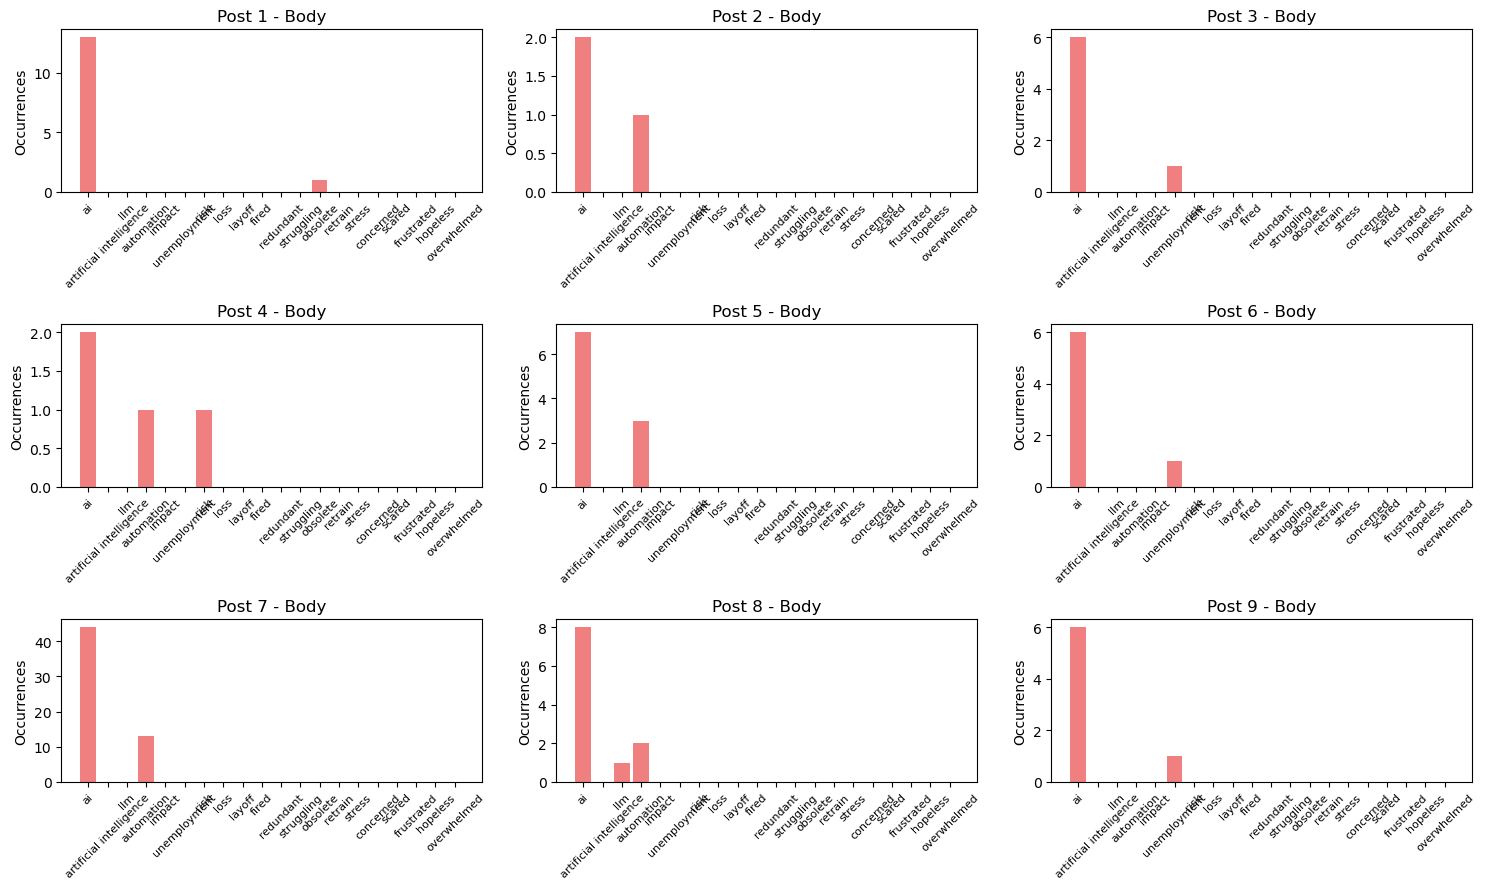

In [29]:
# Load key terms
key_terms = []
with open('terms.txt', 'r') as file:
    key_terms = [line.strip().lower() for line in file]

# Function to count key term occurrences in each post
def count_terms(text_column):
    term_counts = []
    
    for text in df[text_column].astype(str):
        word_count = {term: text.lower().count(term) for term in key_terms}
        term_counts.append(word_count)
    
    return term_counts

# Get frequency counts for Titles and Post Bodies
title_counts = count_terms('Title')
body_counts = count_terms('Selftext')

title_df = pd.DataFrame(title_counts)
body_df = pd.DataFrame(body_counts)

title_df.fillna(0, inplace=True)
body_df.fillna(0, inplace=True)

# Set up grid dimensions
num_posts = min(9, len(df))  
num_cols = 3
num_rows = (num_posts // num_cols) + (num_posts % num_cols > 0)

# Grid for bar titles
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))
axes = axes.flatten()

for i in range(num_posts):
    axes[i].bar(key_terms, title_df.iloc[i], color='skyblue')
    axes[i].set_title(f"Post {i+1} - Title")
    axes[i].set_xticklabels(key_terms, rotation=45, fontsize=8)
    axes[i].set_ylabel("Occurrences")

# Hide unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Grid for bar post bodies 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))
axes = axes.flatten()

for i in range(num_posts):
    axes[i].bar(key_terms, body_df.iloc[i], color='lightcoral')
    axes[i].set_title(f"Post {i+1} - Body")
    axes[i].set_xticklabels(key_terms, rotation=45, fontsize=8)
    axes[i].set_ylabel("Occurrences")

# Hide unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()




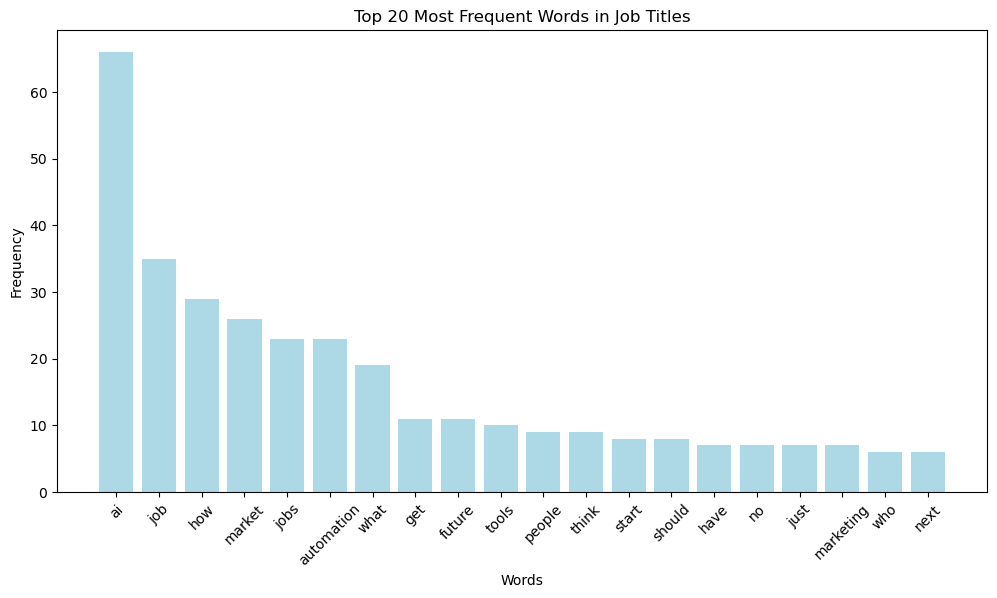

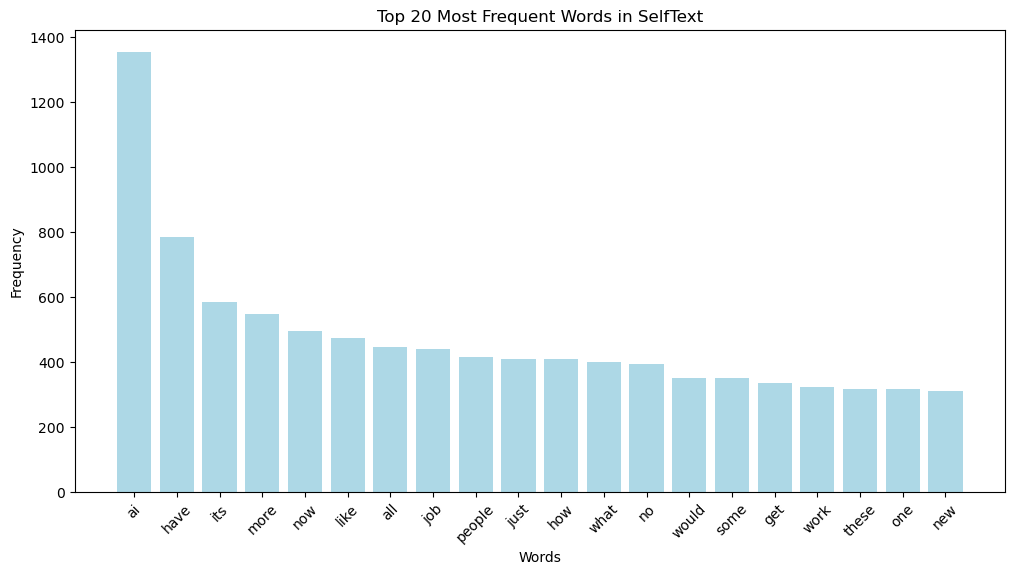

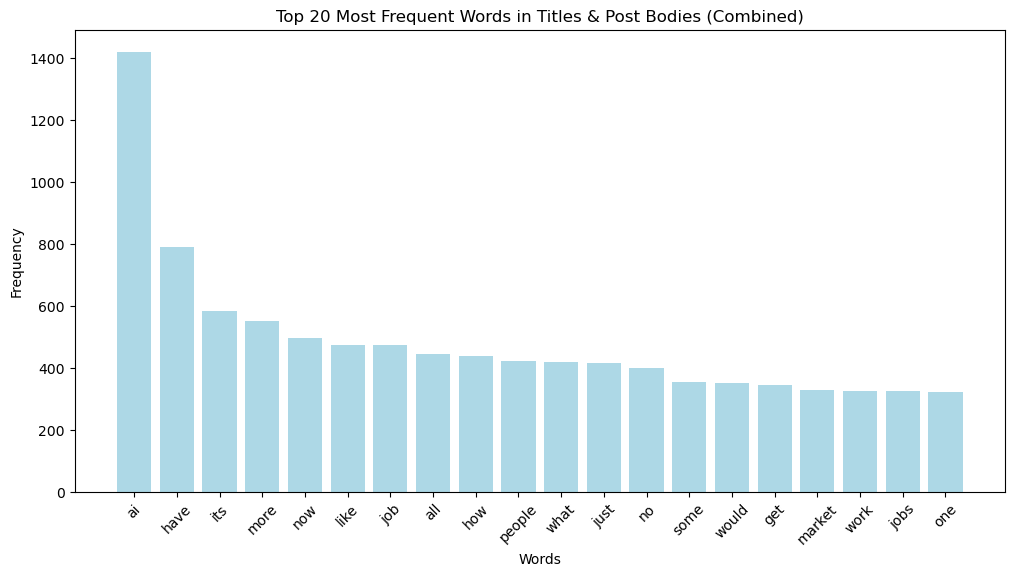

In [32]:
df = pd.read_csv('ai_automation_job_market_data200_edit.csv', encoding='latin1')

# Drop missing values in "Title" and "Selftext"
df = df.dropna(subset=['Title', 'Selftext'])


def process_text(text_series):
    all_text = " ".join(text_series.astype(str)).lower()
    clean_text = re.sub(r'[^a-z\s]', '', all_text)  
    words = clean_text.split()
    
   
    stop_words = set([
        "the", "and", "to", "of", "in", "for", "with", "on", "at", "by", 
        "an", "a", "as", "is", "this", "that", "are", "it", "from", "be", 
        "or", "was", "were", "has", "had", "not", "but", "they", "you", "we",
        "i", "my", "will", "your", "about", "can", "if", "their", "do", "so"
    ])
    
    # Filter out stop words
    filtered_words = [word for word in words if word not in stop_words]
    
    # Count word occurrences
    word_frequencies = Counter(filtered_words)
    
    return word_frequencies.most_common(20)  

# Get word frequencies for Titles, Selftext, and Combined
title_top_words = process_text(df['Title'])
selftext_top_words = process_text(df['Selftext'])
combined_top_words = process_text(df['Title'] + " " + df['Selftext'])


def plot_word_frequencies(top_words, title):
    labels, counts = zip(*top_words)
    
    plt.figure(figsize=(12, 6))
    plt.bar(labels, counts, color='lightblue')
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Generate all three graphs
plot_word_frequencies(title_top_words, "Top 20 Most Frequent Words in Job Titles")
plot_word_frequencies(selftext_top_words, "Top 20 Most Frequent Words in SelfText")
plot_word_frequencies(combined_top_words, "Top 20 Most Frequent Words in Titles & Post Bodies (Combined)")

